# **Airline Passenger Satisfaction (EDA)**
# **Тиводар Олег ШАД-211**

## **Задание 1**
## **Introduction**
### **Переменные датасета:**
### • Gender: Пол пассажира (Female, Male)

### • Customer Type: Тип клиента (Loyal customer, disloyal customer)

### • Age: Возраст пассажира

### • Type of Travel: Цель полета пассажиров (Personal Travel, Business Travel)

### • Class: Класс перелета (Business, Eco, Eco Plus)

### • Flight distance: Дальность полета

### • Inflight wifi service: Уровень удовлетворенности обслуживанием Wi-Fi на борту (0:Not Applicable;1-5)

### • Departure/Arrival time convenient: Уровень удовлетворенности удобным временем отправления/прибытия

### • Ease of Online booking: Уровень удовлетворенности онлайн-бронированием

### • Gate location: Уровень удовлетворенности местоположением выхода

### • Food and drink: Уровень удовлетворенности едой и напитками

### • Online boarding: Уровень удовлетворенности онлайн регистрацией

### • Seat comfort: Уровень удовлетворенности комфортом сидений

### • Inflight entertainment: Уровень удовлетворенности развлечениями на сервисе

### • On-board service: Уровень удовлетворенности сервисом на борту

### • Leg room service: Уровень удовлетворенности расстоянием для ног между сидений

### • Baggage handling: Уровень удовлетворенности местом для ручной клади

### • Check-in service: Уровень удовлетворенности обслуживанием при регистрации

### • Inflight service: Уровень удовлетворенности обслуживанием на борту

### • Cleanliness: Уровень удовлетворенности чистотой

### • Departure Delay in Minutes: Задержка вылета в минутах

### • Arrival Delay in Minutes: Задержка прибытия в минутах

### • Satisfaction: Уровень удовлетворенности авиакомпанией(Satisfaction, neutral or dissatisfaction) (целевая переменная)




In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import ydata_profiling

In [144]:
pd.set_option('display.max_columns', None)

In [145]:
# Загрузка датасетов
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [146]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [147]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [148]:
# Я проверил два датасета, сверил первые несколько строк и названия столбцов. И решил для удобства их объединить
df = df_test.append(df_train)
df

<ipython-input-148-221d22421582>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_test.append(df_train)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## **Задание 2**
## **Data Preprocessing**


In [149]:
# Просмотр колонок
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [150]:
# Удалю ненужные колонки
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [151]:
# Привел название колонок к стандартному виду
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace('-', '_')

In [152]:
# Проверка хедера датасета
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [153]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer_Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129880 non-null  int64  
 7   Departure_Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online_booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online_boarding                    1298

In [154]:
# Статистическая информация о датасете
df.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [155]:
# Количество нулевых значений в датасете
df.isna().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [156]:
# Так как есть пропущенные значения, заменим их на средние значения
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())
df.isna().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

<Axes: >

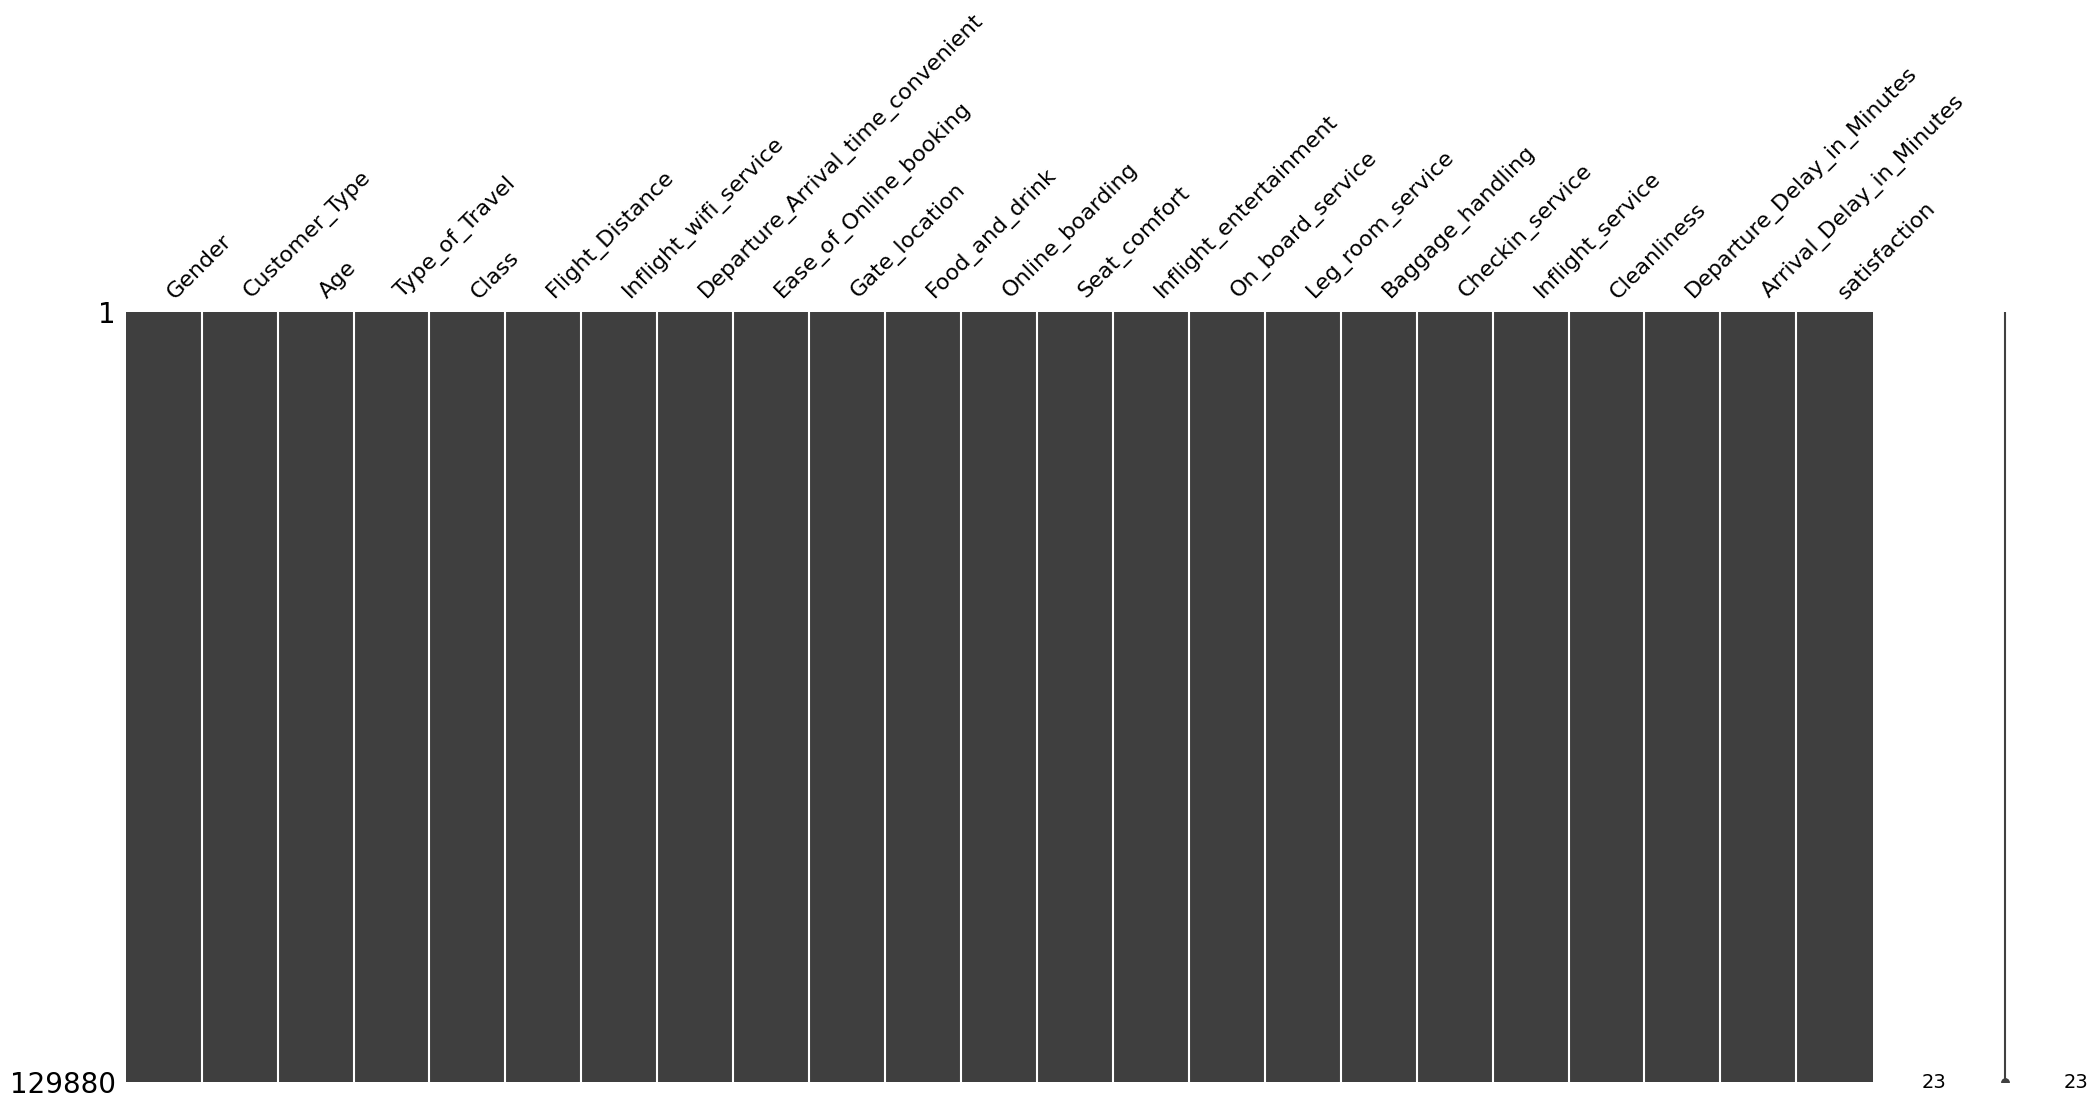

In [157]:
# Матрица ненулевых значений
msn.matrix(df)

# Видим, что матрица полностью заполнена - значит в датасете нет null значений

## **Задание 3**
## **Visualisation**

Female    65899
Male      63981
Name: Gender, dtype: int64


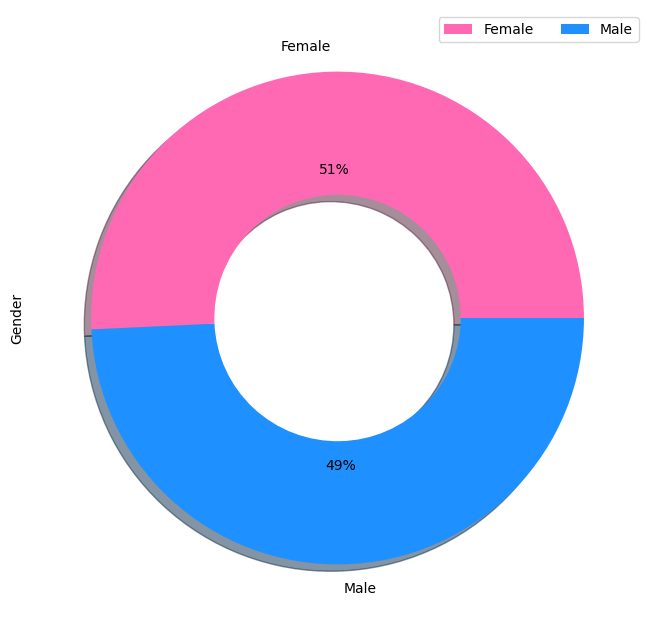

In [158]:
print(df['Gender'].value_counts())
plt.figure(figsize=(10, 8))
colors = ('#FF69B4', '#1E90FF')
df['Gender'].value_counts().plot(kind='pie', autopct="%0.0f%%", colors=colors, shadow=True, wedgeprops={"width":0.5})
plt.legend(ncol=2)
plt.show()

# В этой визуализации видно, что пассажиров с женским полом чуть больше, чем с мужским. Но незначительно

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


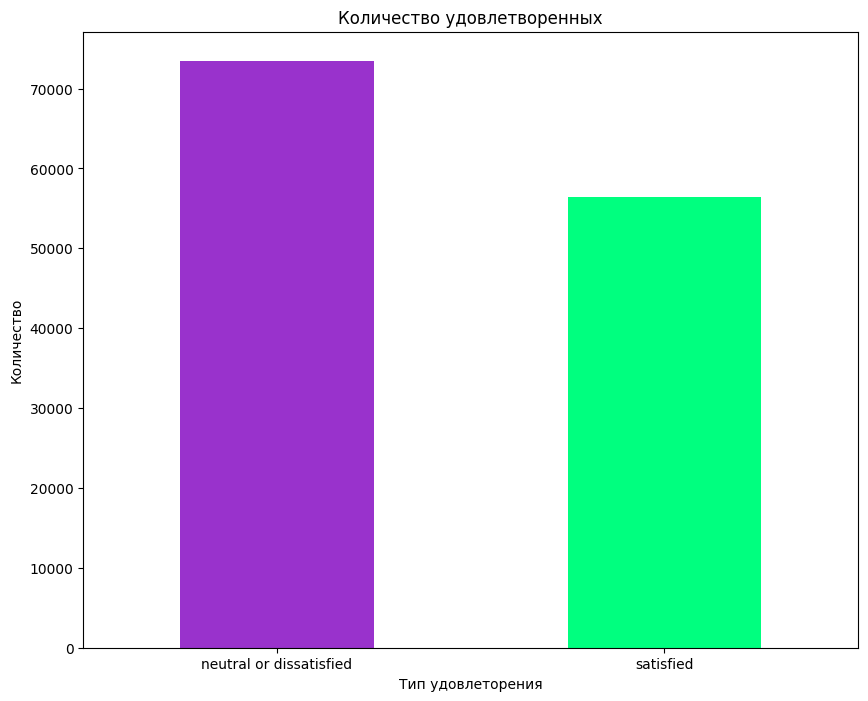

In [159]:
print(df['satisfaction'].value_counts())
plt.figure(figsize=(10, 8))
colors = ('#9932CC', '#00FF7F')
df['satisfaction'].value_counts().plot(kind='bar', color=colors)
plt.title('Количество удовлетворенных')
plt.xlabel('Тип удовлеторения')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Можно сделать вывод, что большая часть пассажирова настроена нейтрально или недовольна

Text(0.5, 1.0, 'Тип пассажира')

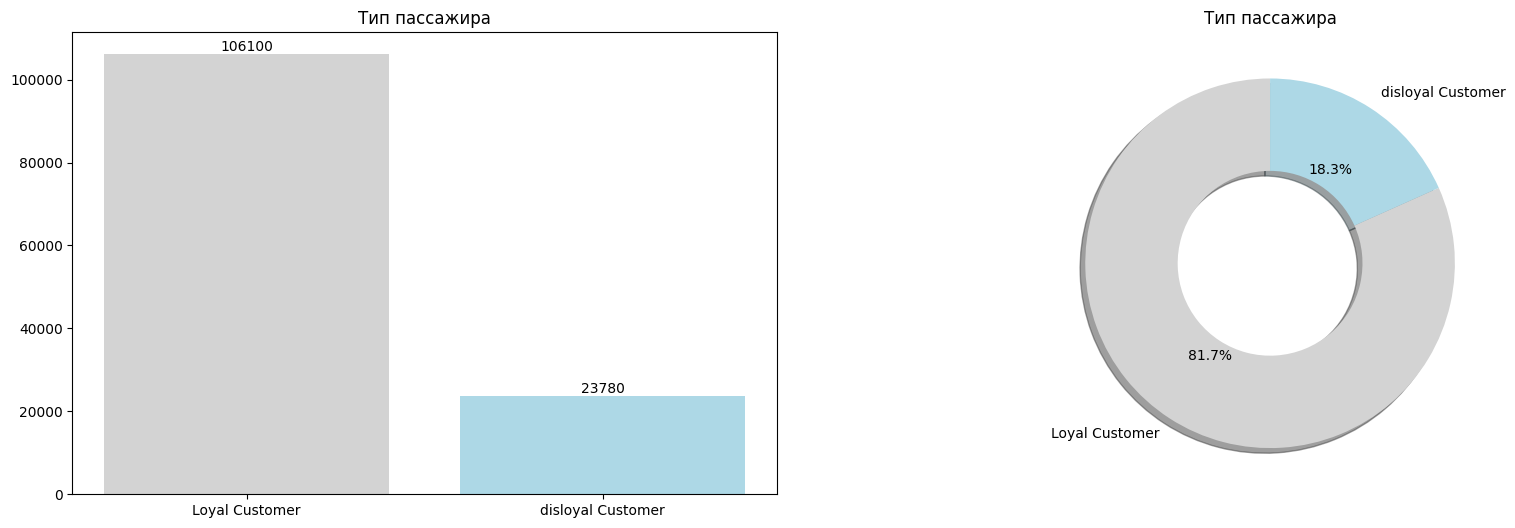

In [160]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,6))


ax1.bar(df["Customer_Type"].value_counts().index,df["Customer_Type"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("Тип пассажира")
for bars in ax1.containers:
    ax1.bar_label(bars)


label = list(df['Customer_Type'].value_counts().index)
value = list(df["Customer_Type"].value_counts().values)
ax2.pie(value,labels=label,autopct="%1.1f%%",startangle = 90,shadow = True, colors = ["lightgrey","lightblue"], wedgeprops={"width":0.5})
ax2.set_title("Тип пассажира")

# Большинство клиентов дают правильные отзывы и, следовательно, они лояльны

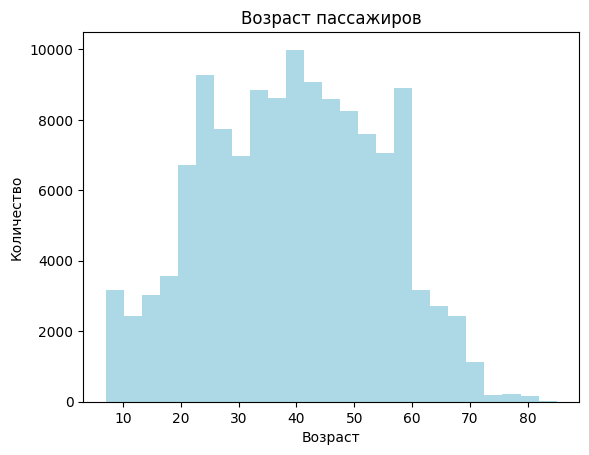

In [161]:
df['Age'].plot(kind='hist', bins = 25, color = 'lightblue')
plt.title('Возраст пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Большее количество пассажиров относится к возрастной группе от 40 до 45 лет

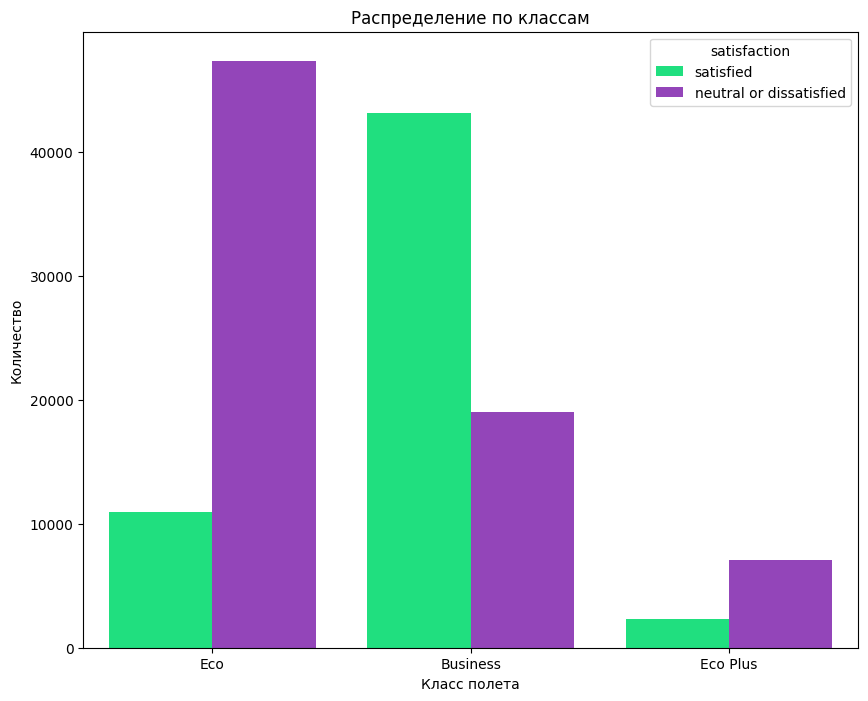

In [162]:
plt.figure(figsize=(10, 8))
custom_palette = ['#00FF7F',
                  '#9932CC']
sns.set_palette(custom_palette)
sns.countplot(x = df["Class"],hue = df["satisfaction"])
plt.title('Распределение по классам')
plt.xlabel('Класс полета')
plt.ylabel('Количество')
plt.show()

# Здесь я вижу, что большинство недовольных клиентов из эконом класса (Эко), довольные клиенты летают в бизнесе

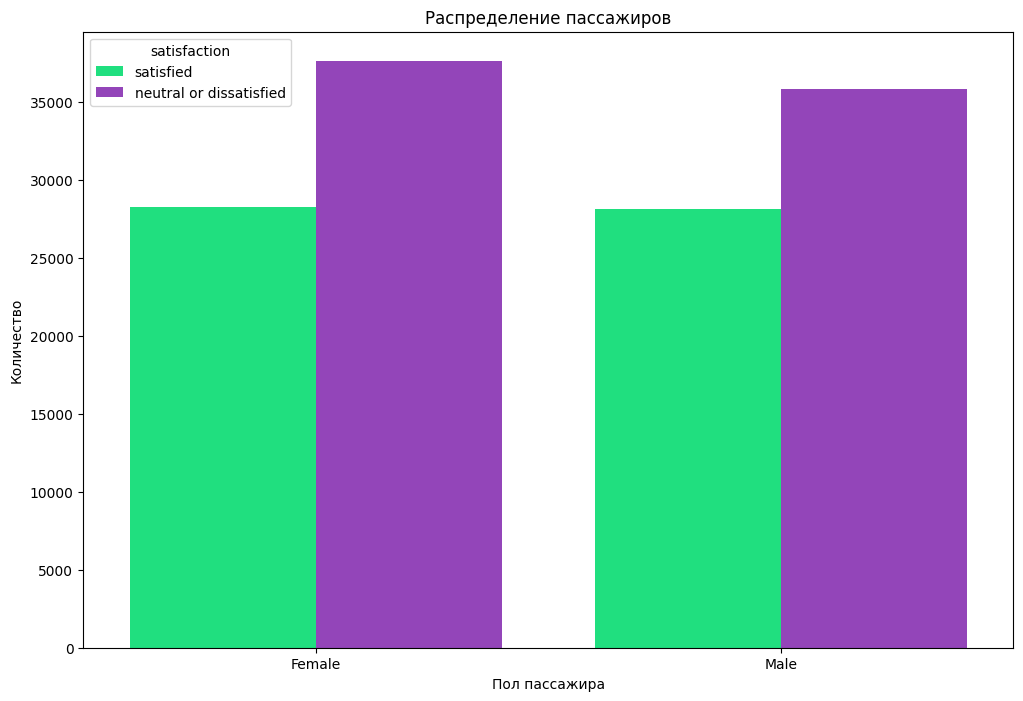

In [163]:
plt.figure(figsize=(12, 8))
custom_palette = ['#00FF7F',
                  '#9932CC']
sns.set_palette(custom_palette)
sns.countplot(x = df["Gender"],hue = df["satisfaction"])
plt.title('Распределение пассажиров')
plt.xlabel('Пол пассажира')
plt.ylabel('Количество')
plt.show()

# Здесь видно, что удовлетворенность клиента не зависит от его пола

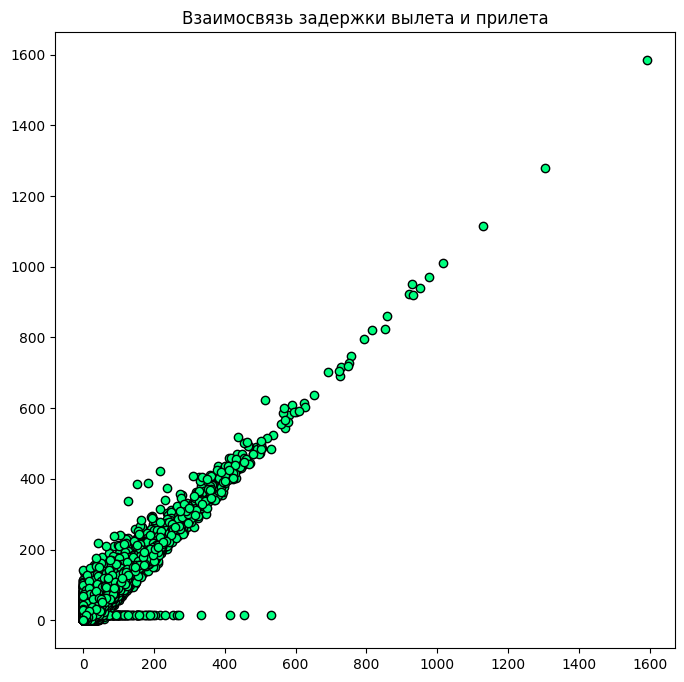

In [164]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(df["Departure_Delay_in_Minutes"],df["Arrival_Delay_in_Minutes"], edgecolors="black")
plt.title('Взаимосвязь задержки вылета и прилета')
plt.show()

# Они оба связаны друг с другом, если задержка вылета увеличивается, то и задержка прибытия также увеличивается

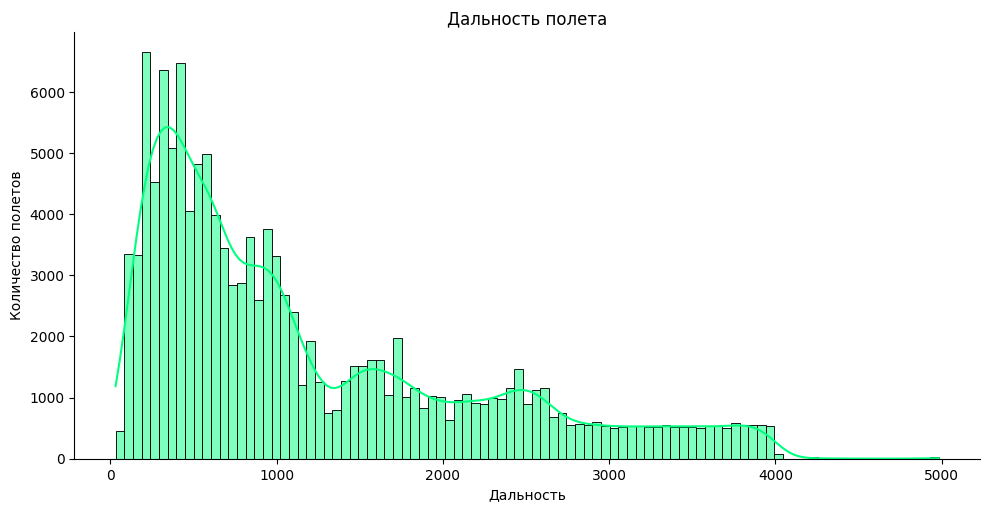

In [165]:
sns.displot(df['Flight_Distance'],kde=True,aspect=2)
plt.title('Дальность полета')
plt.xlabel('Дальность')
plt.ylabel('Количество полетов')
plt.show()

# Более 4000 пассажиров путешествуют примерно на расстояние менее 800 километров

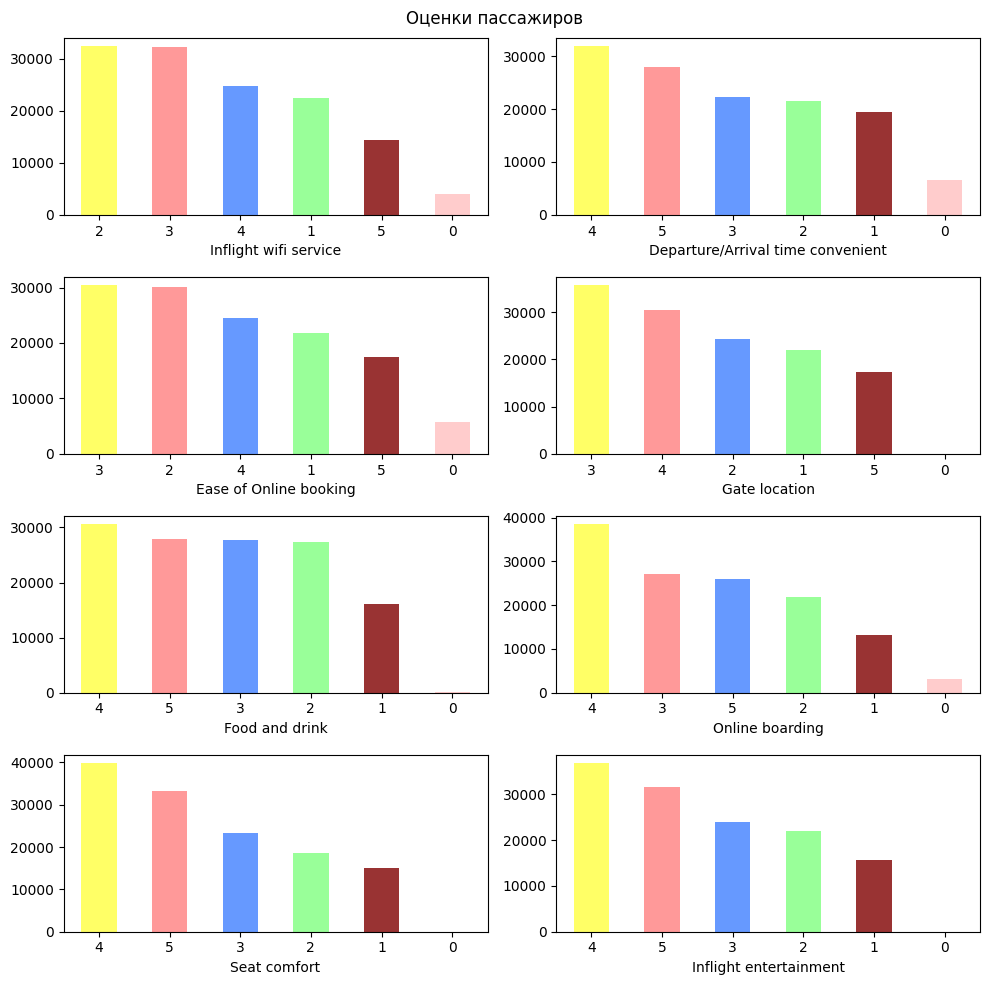

In [166]:
color_list = ['#FFFF66','#FF9999','#6699FF','#99FF99','#993333','#FFCCCC']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
df['Inflight_wifi_service'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
df['Departure_Arrival_time_convenient'].value_counts().plot(kind='bar', color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
df['Ease_of_Online_booking'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
df['Gate_location'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
df['Food_and_drink'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
df['Online_boarding'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
df['Seat_comfort'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
df['Inflight_entertainment'].value_counts().plot(kind='bar', color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')

plt.suptitle('Оценки пассажиров')
plt.tight_layout()

## **Задание 4**
## **Correlation matrix**

<ipython-input-167-65486cfcb540>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size": 6.5}, square=True)


<Axes: >

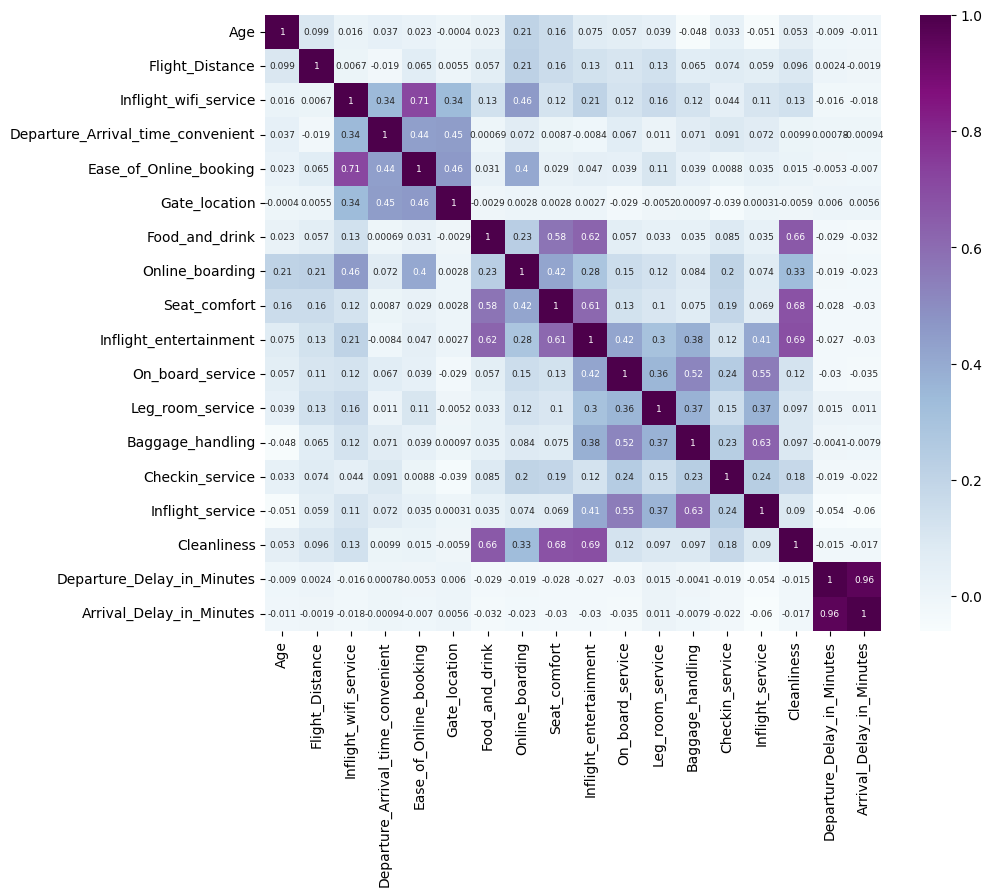

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size": 6.5}, square=True)

1) Сильная корреляция между Inflight_wifi_service и Ease_of_Online_booking: Эти два признака имеют высокую положительную корреляцию (0.71). Это может означать, что клиенты, которые оценивают беспроводной интернет на борту как хороший сервис, также часто оценивают удобство онлайн-бронирования положительно.

2) Сильная корреляция между Inflight_entertainment и On_board_service: Эти признаки также имеют высокую положительную корреляцию (0.61). Это может указывать на то, что пассажиры, которые оценивают развлечения на борту как хорошие, также оценивают обслуживание на борту положительно.

3) Сильная корреляция между Seat_comfort и Cleanliness: Эти признаки также имеют высокую положительную корреляцию (0.68). Это может свидетельствовать о том, что пассажиры, которые считают комфорт посадочных мест хорошим, также оценивают чистоту на борту положительно.

## **Задание 5**
## **Pandas-profiling**

In [168]:
ydata_profiling.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

Библиотека pandas-profiling особо мне ничем не помогла в этом наборе данных. Но она описала каждую переменную и сделала визуализации. Проверила пропущенные значения. Да, эта библиотека удобна для презентаций, но в данном датасете она не особо помогла.

## **Задание 6**




Вопросы, на которые важно получить ответы:
1.   Какие аспекты обслуживания наиболее важны для клиентов и какие можно улучшить?
2.   Какие факторы влияют на уровень лояльности клиентов?
3.   Какие факторы влияют на задержки при вылете и прибытии?
4.   Есть ли различия в удовлетворенности между личными и деловыми путешественниками?

Вопросы для бизнес-заказчика:
1.   Какие меры могут быть предприняты для улучшения уровня удовлетворенности клиентов и увеличения лояльности?
2.   Какие классы перелета следует продвигать среди клиентов для увеличения дохода?
3.   Какие аспекты обслуживания требуют наибольшего внимания и улучшения?

Дополнительные данные:
1.   Данные о ценовой политике
2.   Данные о метеорологических условиях

Обобщение: был проведен анализ набора данных о клиентах авиакомпании с целью понимания уровня удовлетворенности, факторов, влияющих на лояльность клиентов и задержки в перелетах. Были выявлены различные аспекты для дальнейшего исследования и улучшения качества обслуживания.Дополнительные данные и анализы могут помочь авиакомпании лучше удовлетворять потребности клиентов и повышать свою конкурентоспособность на рынке авиаперевозок.